In [2]:
#### This is Jupyter Lab running R kernel
#Problem 1 part(a)
ar1_mle<-rep(0,30)
ar2_mle<-rep(0,30)
sig_mle<-rep(0,30)
ar1_cls<-rep(0,30)
ar2_cls<-rep(0,30)
sig_cls<-rep(0,30)
for (i in 1:20){
    sim<-arima.sim(300,model=list(order=c(2,0,0),ar=c(0.9,-0.5)))
    for (n in 1:30){
        N<-n*10
        mle_fit<-arima(sim[1:N],order=c(2,0,0),method=c("ML"))
        cls_fit<-arima(sim[1:N],order=c(2,0,0),method=c("CSS"))
        ar1_mle[n]<-ar1_mle[n]+mle_fit$coef['ar1']
        ar2_mle[n]<-ar2_mle[n]+mle_fit$coef['ar2']
        sig_mle[n]<-sig_mle[n]+mle_fit$sigma2
        ar1_cls[n]<-ar1_cls[n]+cls_fit$coef['ar1']
        ar2_cls[n]<-ar2_cls[n]+cls_fit$coef['ar2']
        sig_cls[n]<-sig_cls[n]+cls_fit$sigma2
    }
}

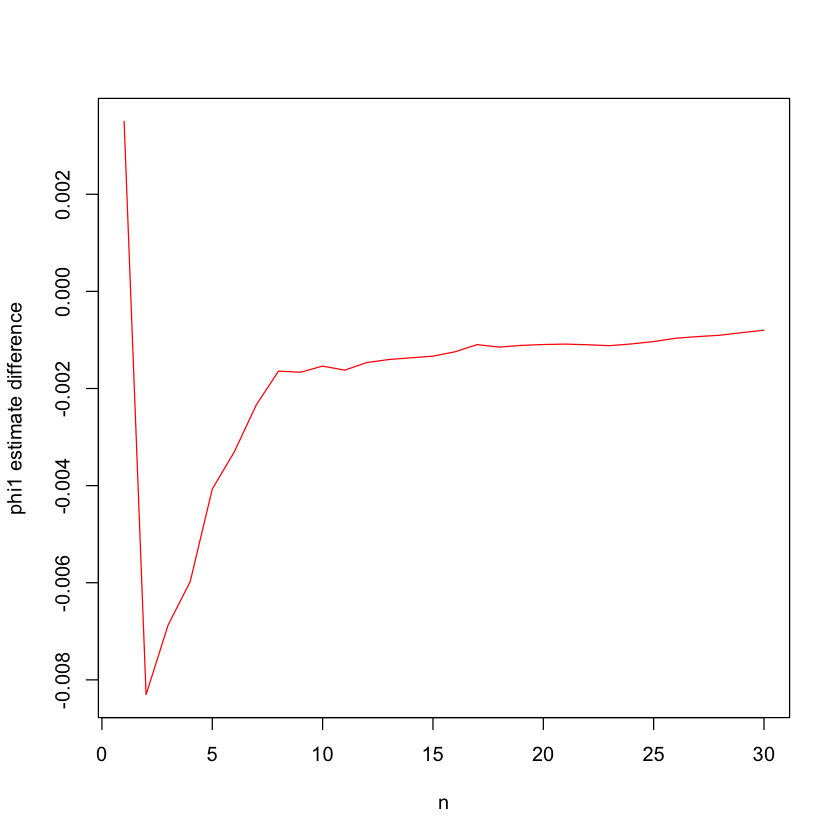

In [3]:
plot(ar1_mle/20-ar1_cls/20,type='l',col='red',ylab='phi1 estimate difference',xlab='n')


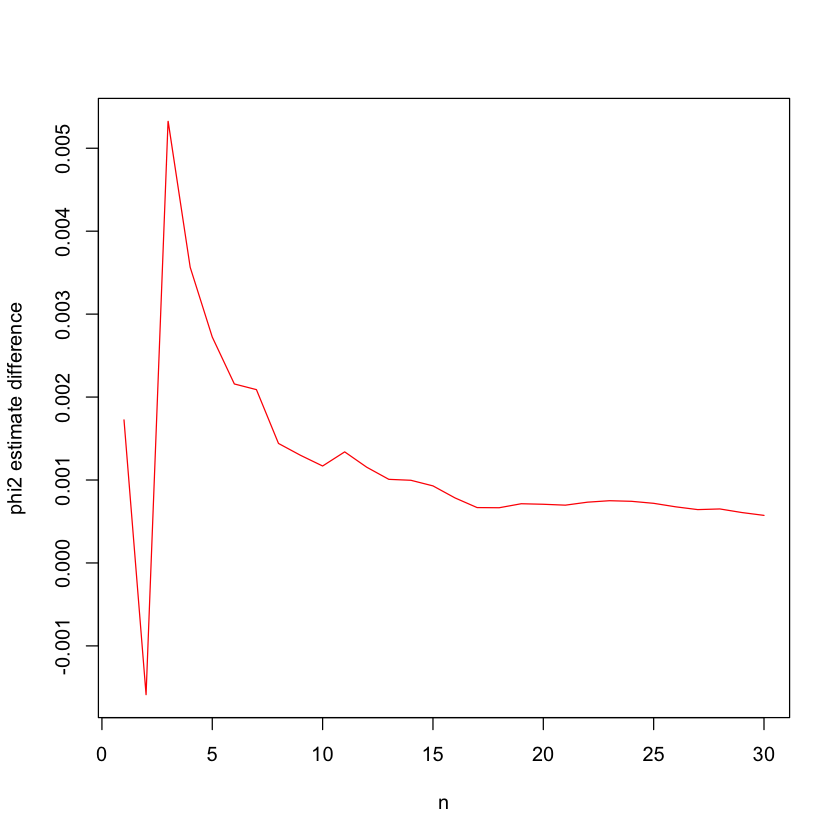

In [4]:
plot(ar2_mle/20-ar2_cls/20,type='l',col='red',ylab='phi2 estimate difference',xlab='n')

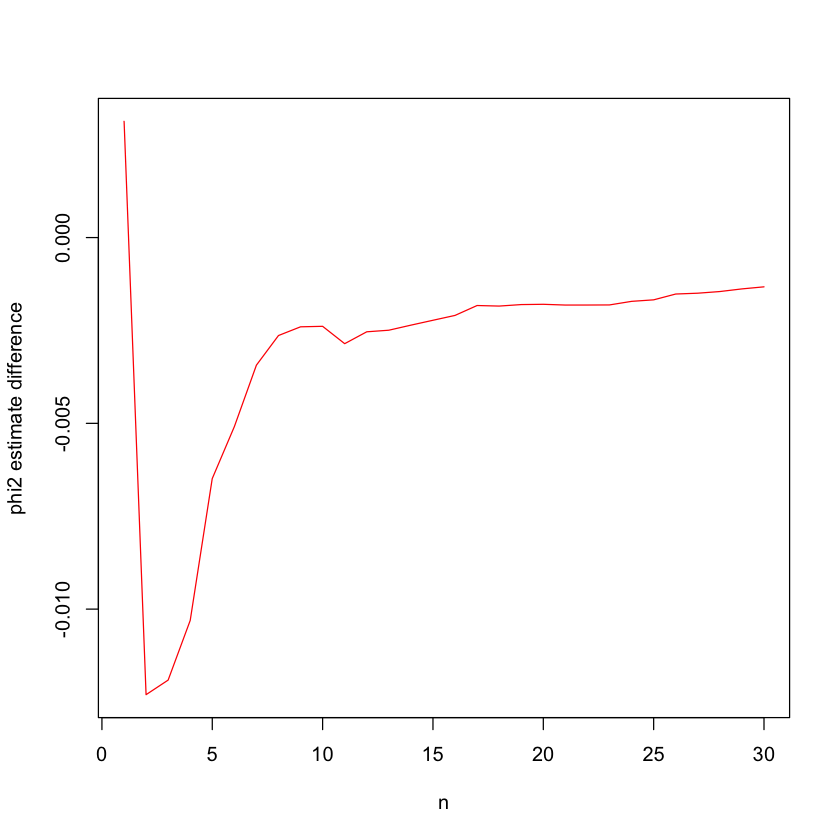

In [5]:
plot(sig_mle/20-sig_cls/20,type='l',col='red',ylab='phi2 estimate difference',xlab='n')

In [6]:
#Problem 2
library(astsa)
library(itsmr)


Attaching package: ‘itsmr’


The following object is masked from ‘package:astsa’:

    trend




In [7]:
arima(cmort,order=c(2,0,0),method='ML')


Call:
arima(x = cmort, order = c(2, 0, 0), method = "ML")

Coefficients:
         ar1     ar2  intercept
      0.4301  0.4424    88.8416
s.e.  0.0397  0.0398     1.9415

sigma^2 estimated as 32.37:  log likelihood = -1604.71,  aic = 3217.43

In [8]:
arima(cmort,order=c(2,0,0),method='CSS')


Call:
arima(x = cmort, order = c(2, 0, 0), method = "CSS")

Coefficients:
         ar1     ar2  intercept
      0.4286  0.4418    88.3356
s.e.  0.0397  0.0397     1.9473

sigma^2 estimated as 32.32:  part log likelihood = -1603.63

In [9]:
yw(cmort,2)

$phi
[1] 0.4339481 0.4375768

$theta
[1] 0

$sigma2
[1] 32.37303

$aicc
[1] 3215.5

$se.phi
[1] 0.03989471 0.03989471

$se.theta
[1] 0

In [10]:
#Problem 3
sunspot<-read.table("R codes/sunspot.dat")
sunspot_sqrt<-sqrt(sunspot)[,1]

ACF,0.83,0.47,0.07,-0.24,-0.41,-0.39,-0.20,0.09,0.40,0.61,⋯,-0.21,0.00,0.21,0.36,0.39,0.29,0.09,-0.13,-0.30,-0.37
PACF,0.83,-0.68,-0.12,0.02,-0.04,0.21,0.19,0.16,0.26,0.01,⋯,-0.11,0.04,-0.03,0.05,-0.02,-0.10,-0.06,0.01,-0.03,0.06


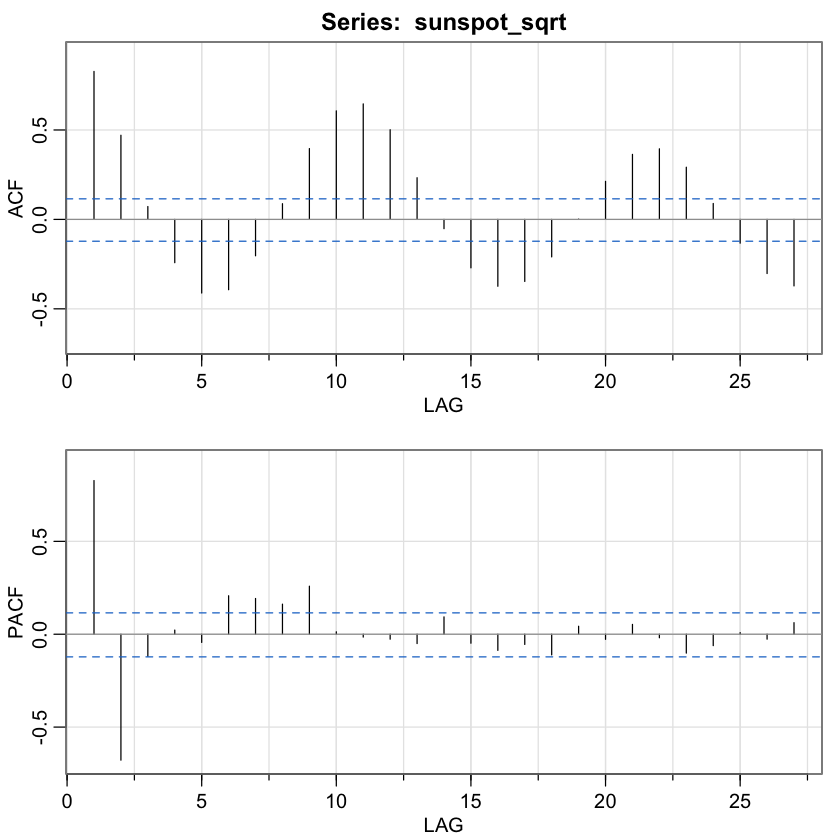

In [11]:
#part(1)
acf2(sunspot_sqrt)

In [12]:
#PACF cuts off at lag 2, and ACF decays sinusoidally, choose AR(2) model, use condtional least square method
fit<-arima(sunspot_sqrt,order=c(2,0,0),method="CSS")
fit


Call:
arima(x = sunspot_sqrt, order = c(2, 0, 0), method = "CSS")

Coefficients:
         ar1      ar2  intercept
      1.4041  -0.6917     6.3559
s.e.  0.0427   0.0426     0.2398

sigma^2 estimated as 1.355:  part log likelihood = -447.73

In [13]:
pred<-predict(fit,4)
pred

$pred
Time Series:
Start = 286 
End = 289 
Frequency = 1 
[1] 5.695724 5.139054 5.103965 5.439762

$se
Time Series:
Start = 286 
End = 289 
Frequency = 1 
[1] 1.164207 2.006875 2.499500 2.677984

In [14]:
#95 CI
upper<-pred$pred+1.96*pred$se
print(upper)
lower<-pred$pred-1.96*pred$se
print(lower)

Time Series:
Start = 286 
End = 289 
Frequency = 1 
[1]  7.977570  9.072529 10.002985 10.688610
Time Series:
Start = 286 
End = 289 
Frequency = 1 
[1] 3.4138776 1.2055794 0.2049459 0.1909145


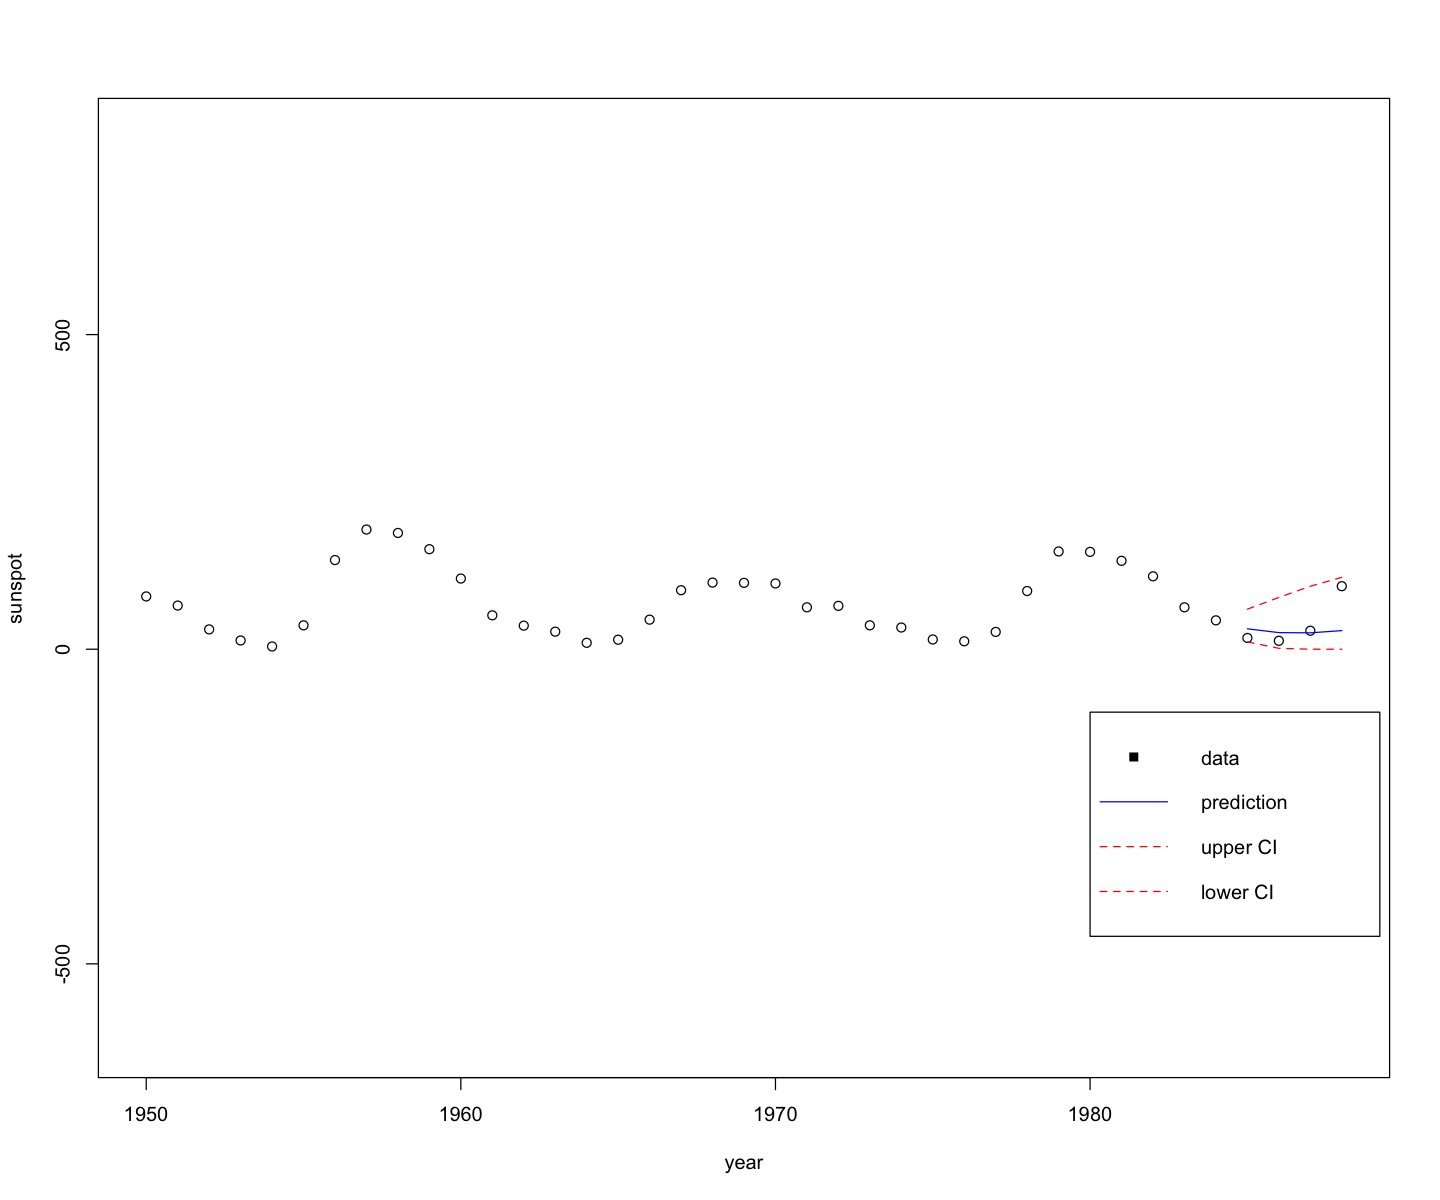

In [15]:
sunspot2=read.table("R codes//sunspot2.dat")
#if we plot all the data, the prediction part will be very hard to see, so I am plotting only year 1975 and later
options(repr.plot.width=12, repr.plot.height=10)
plot(1950:1988,rbind(sunspot,sunspot2)[251:289,1],col='black',ylab='sunspot',xlab='year',asp=0.02)
lines(1985:1988,pred$pred^2,col='blue')
lines(1985:1988,upper^2,lty=2,col='red')
lines(1985:1988,lower^2,lty=2,col='red')
legend(1980,-100,legend=c("data","prediction","upper CI", "lower CI"),col=c('black','blue','red','red'),pch=c(15,NA,NA,NA),lty=c(NA,1,2,2))

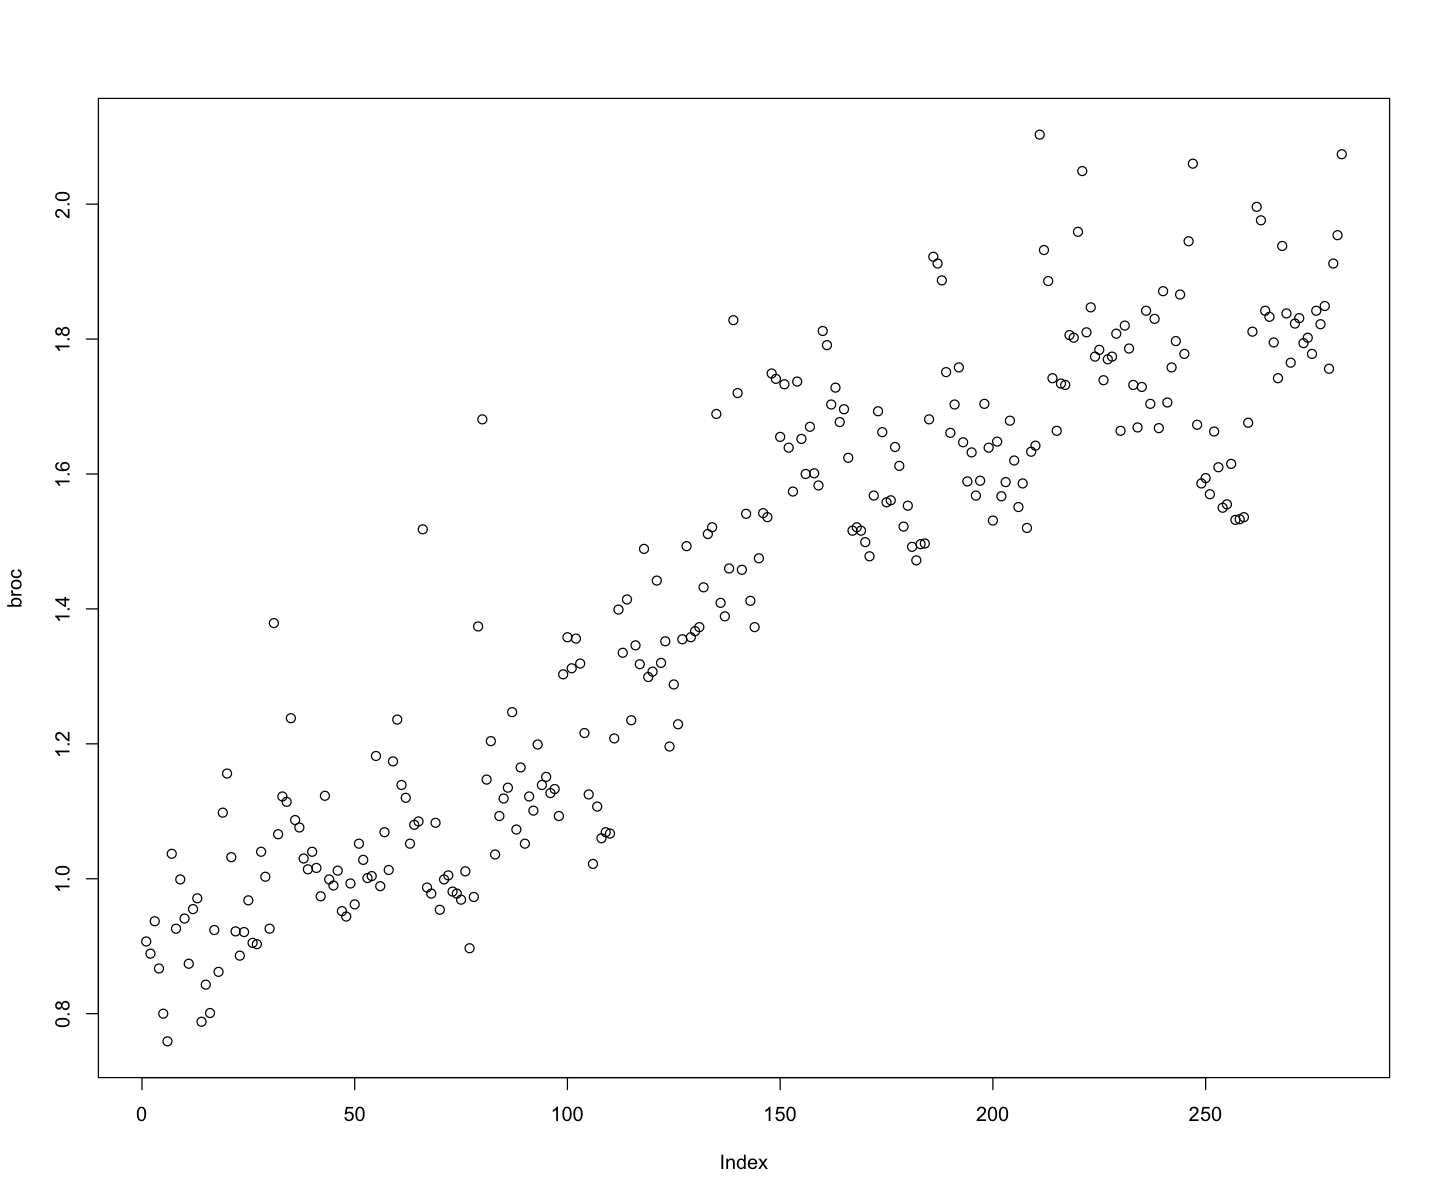

In [16]:
#problem 5
broc<-read.csv("R codes//broc.csv")
broc=broc[,3]
plot(broc)
#there seems to be a linear trend, so use 1st order differencing

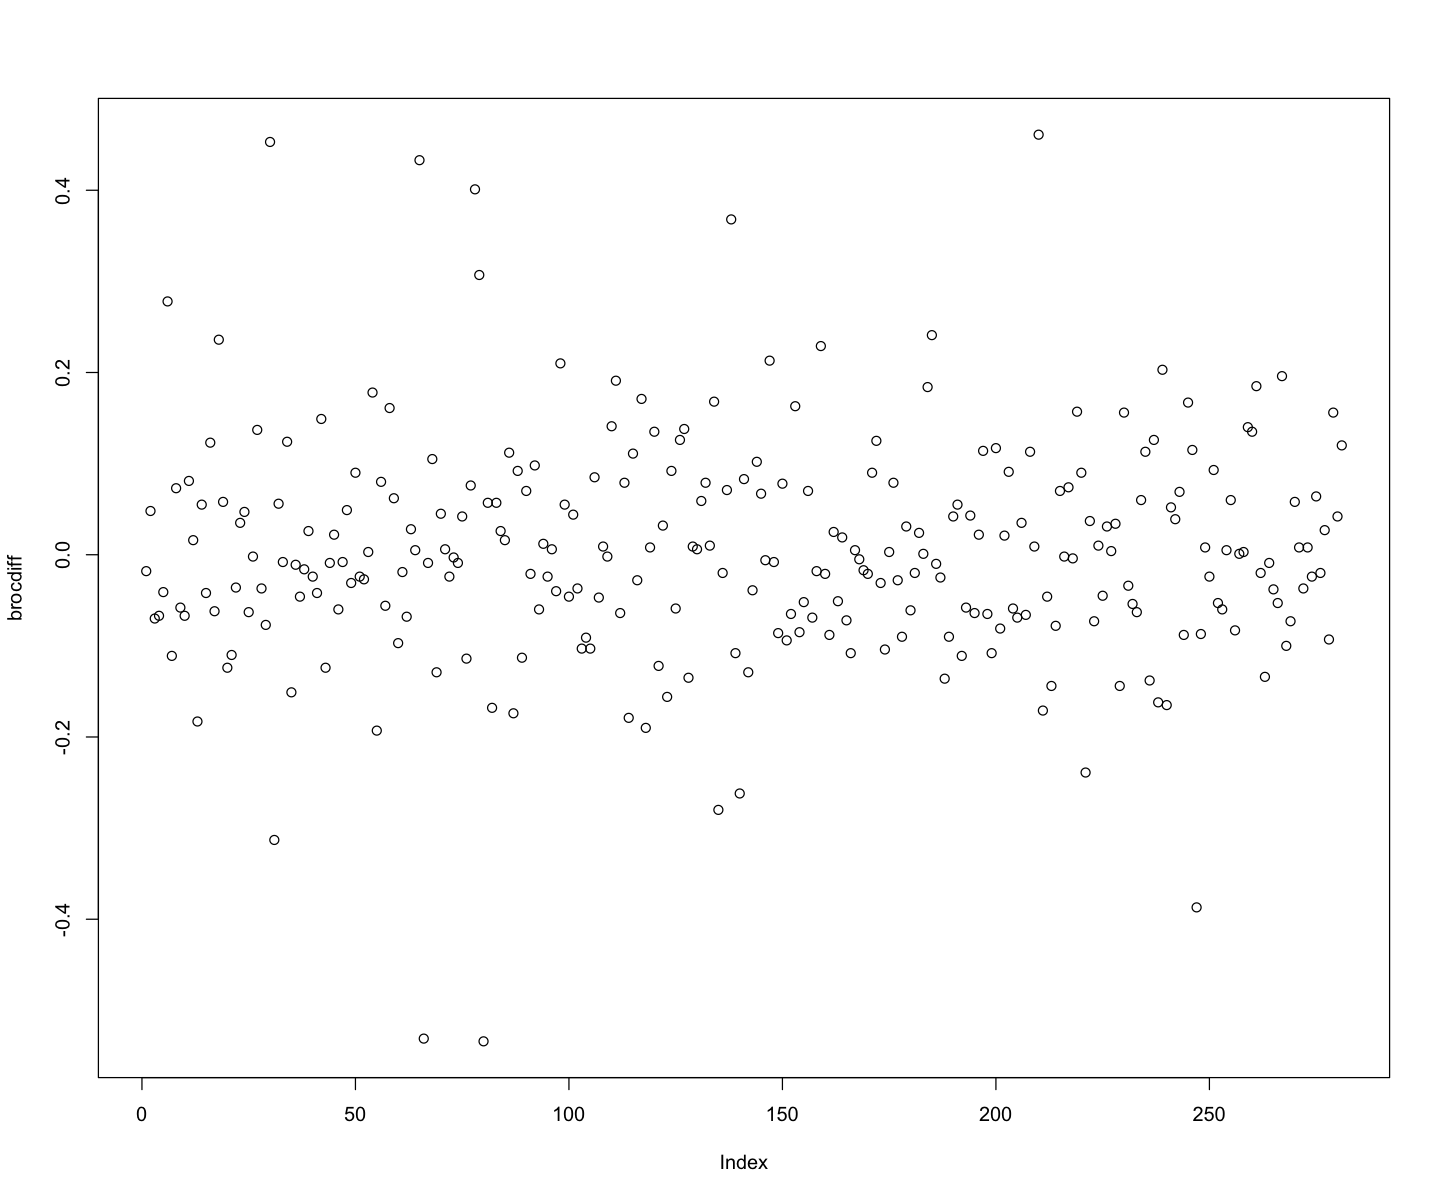

In [17]:
brocdiff=diff(broc)
plot(brocdiff)
#after 1st ordering differencing, the plot looks stationary

ACF,-0.27,-0.05,-0.08,-0.03,-0.07,0.03,0.06,-0.11,0.08,-0.04,⋯,0.02,-0.04,0.04,0.07,-0.05,0.00,-0.01,0.07,0.01,0.02
PACF,-0.27,-0.14,-0.15,-0.12,-0.16,-0.09,-0.01,-0.15,-0.03,-0.08,⋯,-0.07,-0.08,-0.04,0.01,-0.04,-0.05,-0.03,0.05,0.06,0.07


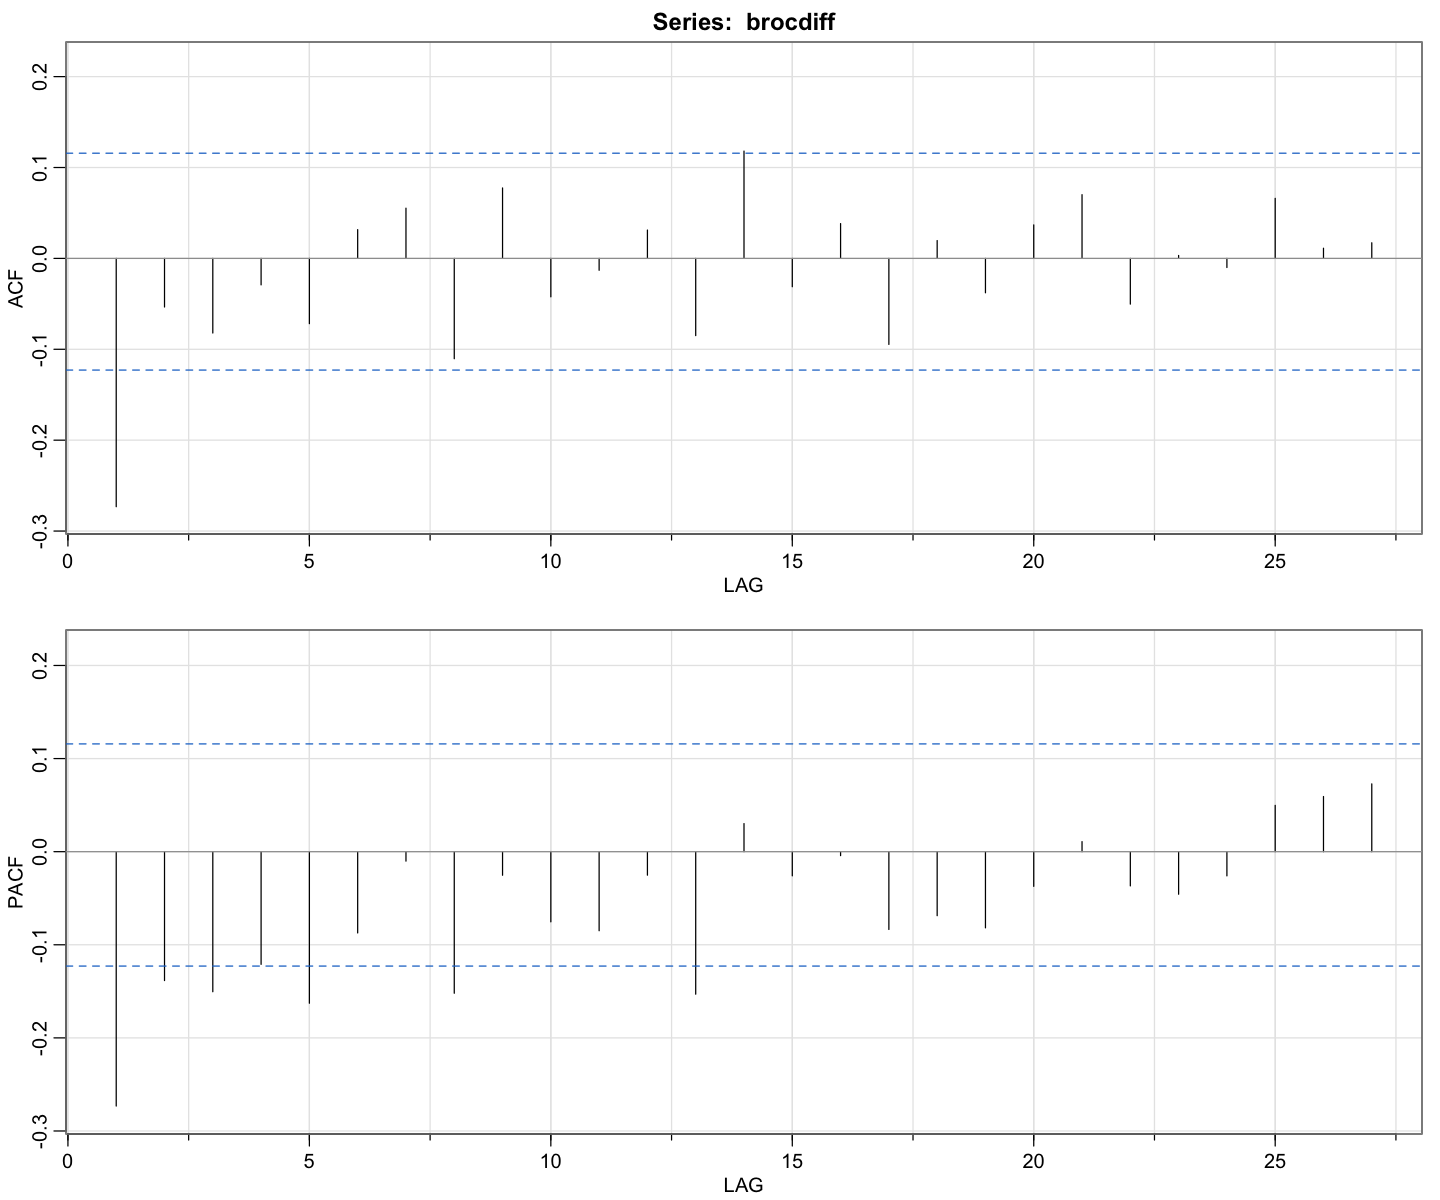

In [18]:
acf2(brocdiff)
#we can see that the ACF cuts off after lag 1 while the PACF decays, which suggests MA(1) is the most appropriate model 

initial  value -2.087226 
iter   2 value -2.132014
iter   3 value -2.135813
iter   4 value -2.135895
iter   4 value -2.135895
iter   4 value -2.135895
final  value -2.135895 
converged
initial  value -2.139019 
iter   2 value -2.139020
iter   2 value -2.139020
iter   2 value -2.139020
final  value -2.139020 
converged


$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    xreg = xmean, include.mean = FALSE, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
          ar1      ar2   xmean
      -0.3114  -0.1386  0.0040
s.e.   0.0591   0.0590  0.0049

sigma^2 estimated as 0.01386:  log likelihood = 202.34,  aic = -396.69

$degrees_of_freedom
[1] 278

$ttable
      Estimate     SE t.value p.value
ar1    -0.3114 0.0591 -5.2667  0.0000
ar2    -0.1386 0.0590 -2.3495  0.0195
xmean   0.0040 0.0049  0.8287  0.4080

$AIC
[1] -1.411694

$AICc
[1] -1.411385

$BIC
[1] -1.359902


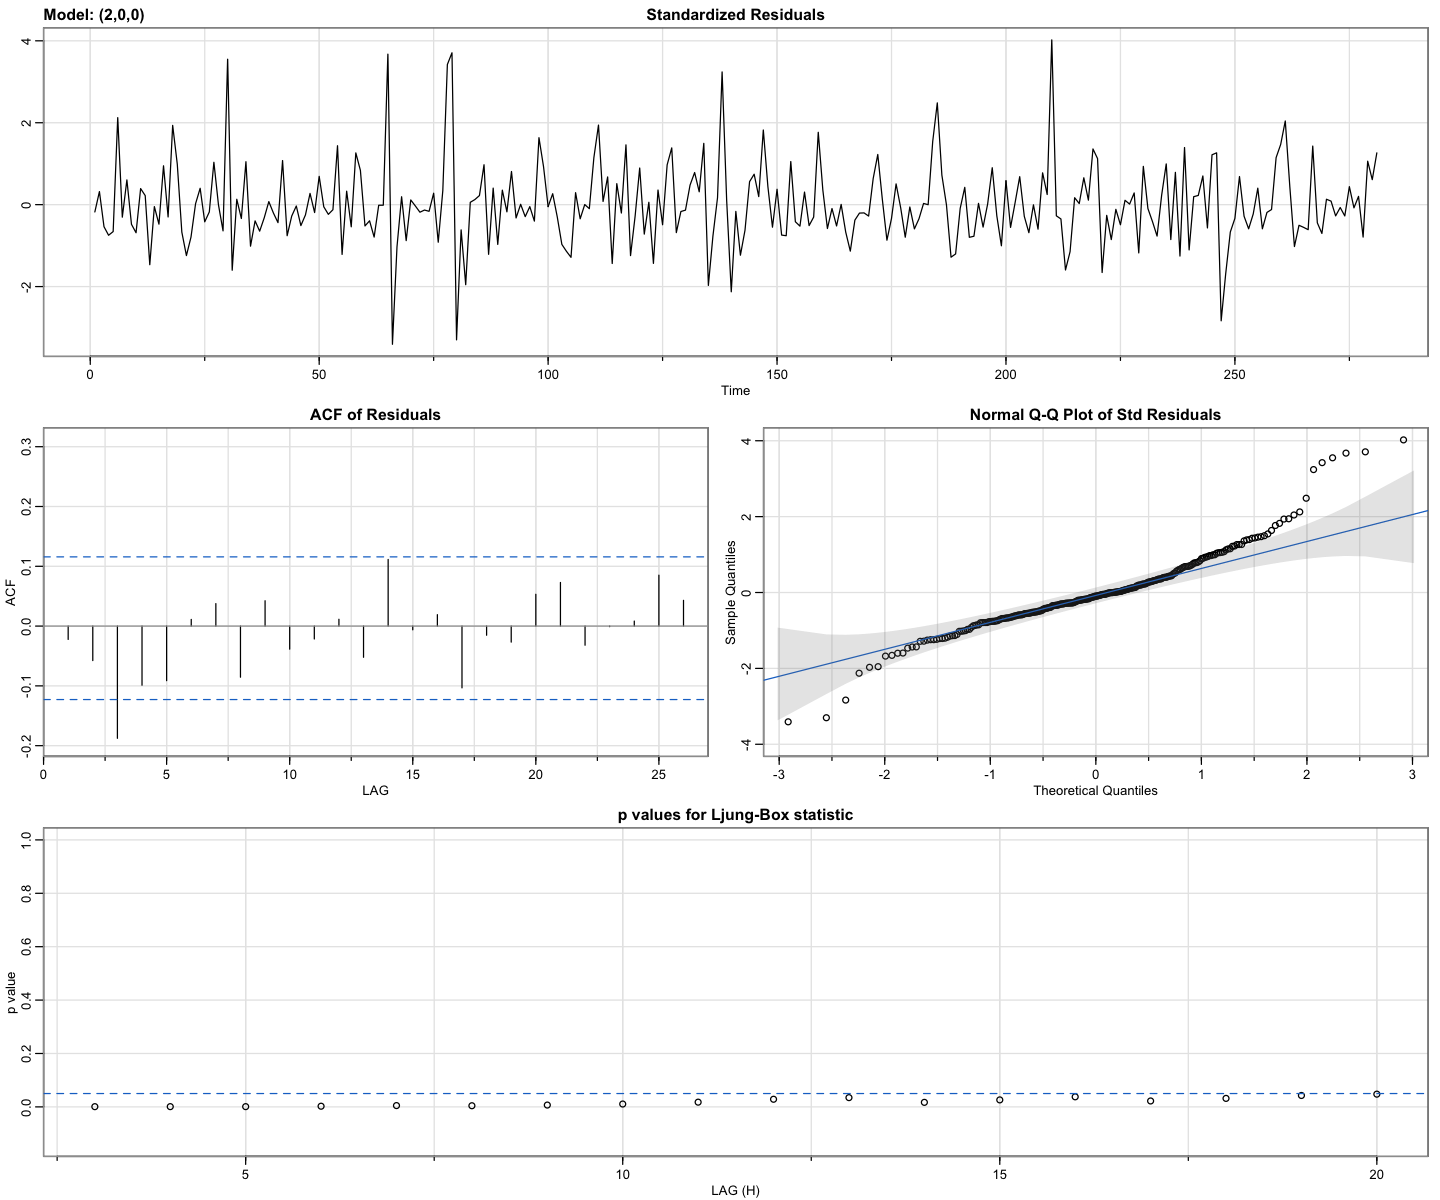

In [19]:
(ar2fit<-sarima(brocdiff,2,0,0)) #AR(2)

initial  value -2.090516 
iter   2 value -2.139758
iter   3 value -2.147187
iter   4 value -2.147293
iter   5 value -2.147293
iter   5 value -2.147293
iter   5 value -2.147293
final  value -2.147293 
converged
initial  value -2.146932 
iter   2 value -2.146935
iter   3 value -2.146935
iter   3 value -2.146935
iter   3 value -2.146935
final  value -2.146935 
converged


$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    xreg = xmean, include.mean = FALSE, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
          ma1   xmean
      -0.4320  0.0039
s.e.   0.0787  0.0040

sigma^2 estimated as 0.01364:  log likelihood = 204.57,  aic = -403.13

$degrees_of_freedom
[1] 279

$ttable
      Estimate     SE t.value p.value
ma1    -0.4320 0.0787 -5.4894  0.0000
xmean   0.0039 0.0040  0.9949  0.3206

$AIC
[1] -1.434641

$AICc
[1] -1.434487

$BIC
[1] -1.395797


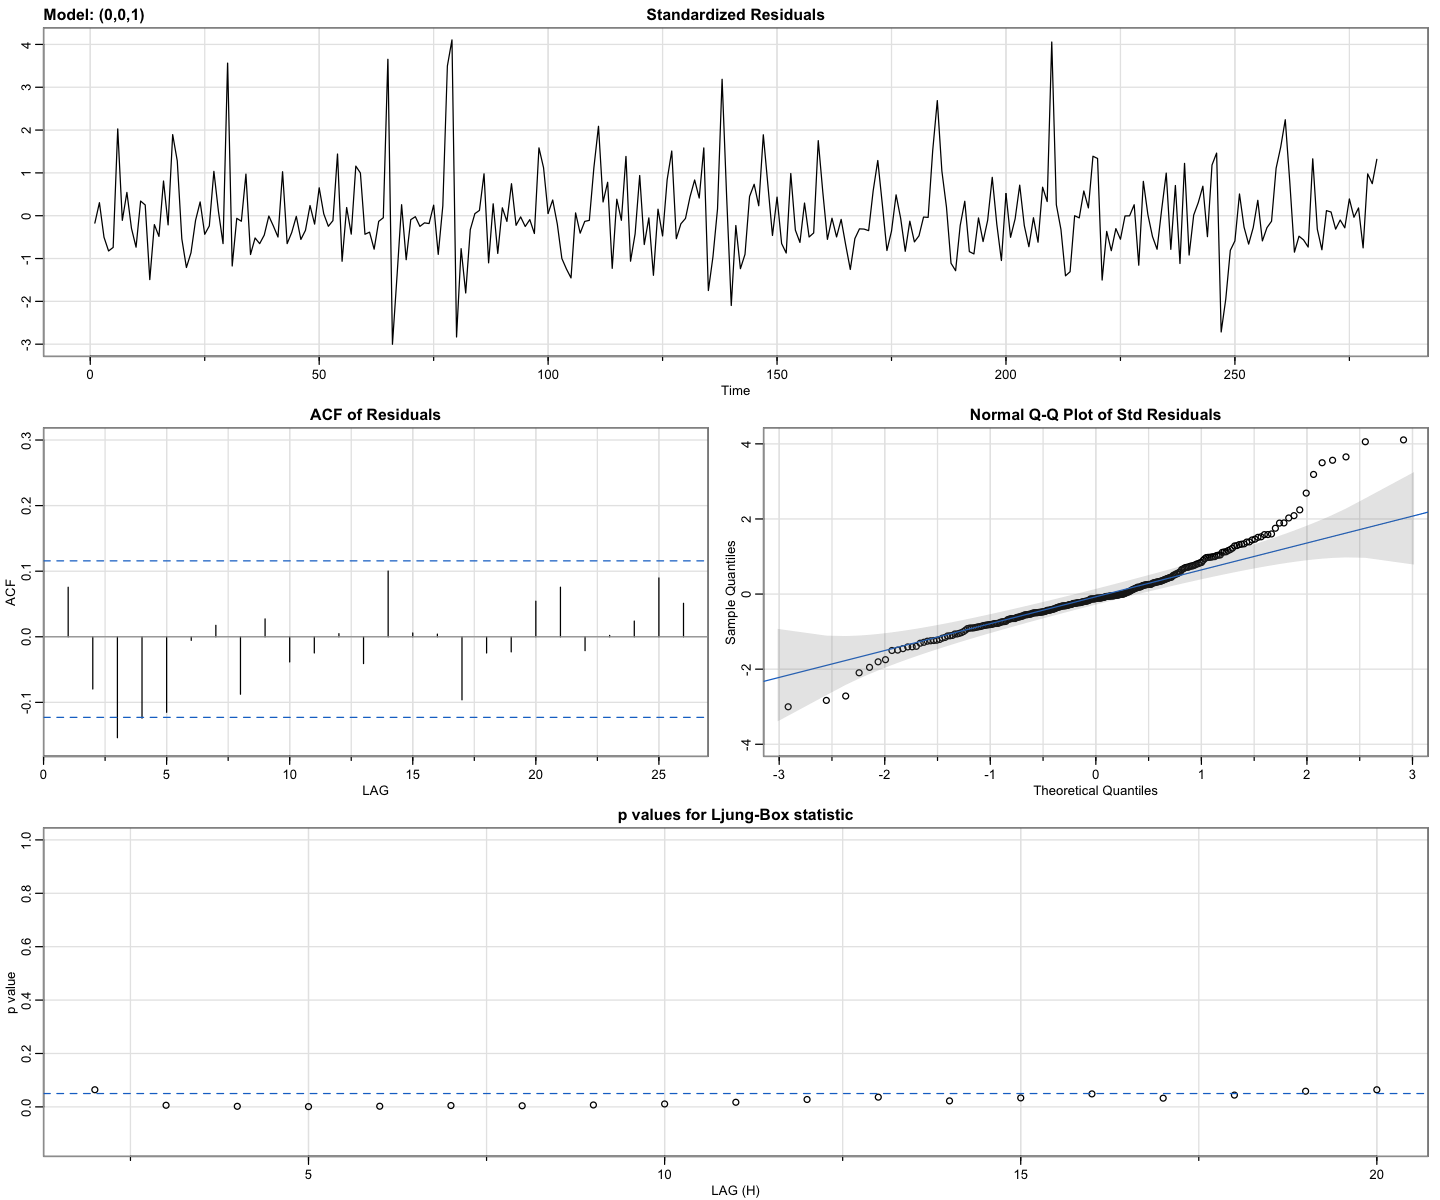

In [20]:
(ma1fit<-sarima(brocdiff,0,0,1)) #MA(1)

initial  value -2.088791 
iter   2 value -2.115995
iter   3 value -2.135474
iter   4 value -2.136952
iter   5 value -2.154156
iter   6 value -2.163205
iter   7 value -2.171712
iter   8 value -2.185795
iter   9 value -2.197758
iter  10 value -2.197958
iter  11 value -2.198091
iter  12 value -2.198108
iter  13 value -2.198111
iter  14 value -2.198113
iter  15 value -2.198115
iter  16 value -2.198117
iter  16 value -2.198117
iter  16 value -2.198117
final  value -2.198117 
converged
initial  value -2.197890 
iter   2 value -2.197915
iter   3 value -2.197923
iter   4 value -2.197929
iter   5 value -2.197929
iter   6 value -2.197929
iter   6 value -2.197929
iter   6 value -2.197929
final  value -2.197929 
converged


$fit

Call:
arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, Q), period = S), 
    xreg = xmean, include.mean = FALSE, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
         ar1      ma1   xmean
      0.5133  -0.9387  0.0035
s.e.  0.0639   0.0274  0.0009

sigma^2 estimated as 0.01228:  log likelihood = 218.9,  aic = -429.79

$degrees_of_freedom
[1] 278

$ttable
      Estimate     SE  t.value p.value
ar1     0.5133 0.0639   8.0277   0e+00
ma1    -0.9387 0.0274 -34.2860   0e+00
xmean   0.0035 0.0009   4.0261   1e-04

$AIC
[1] -1.529512

$AICc
[1] -1.529204

$BIC
[1] -1.477721


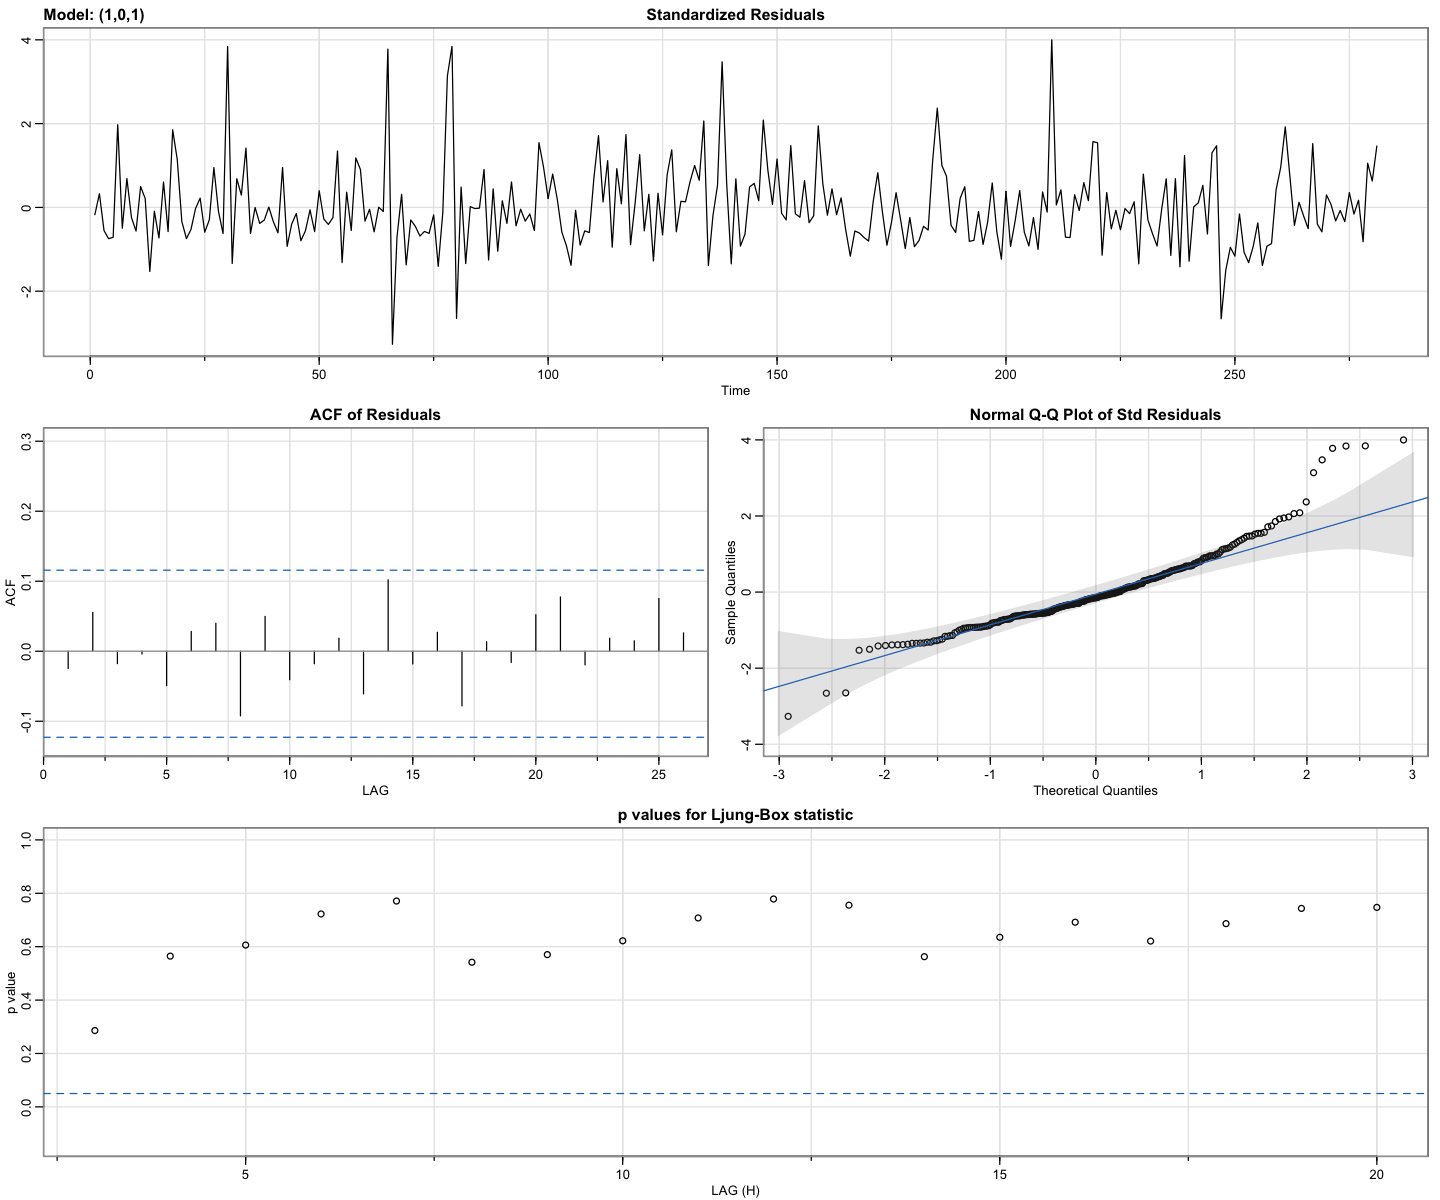

In [21]:
(arma1fit<-sarima(brocdiff,1,0,1)) #ARMA(1,1)

In [22]:
#part(e)
broctest=read.csv("R codes//broc_test.csv")
broctest=broctest[,3]

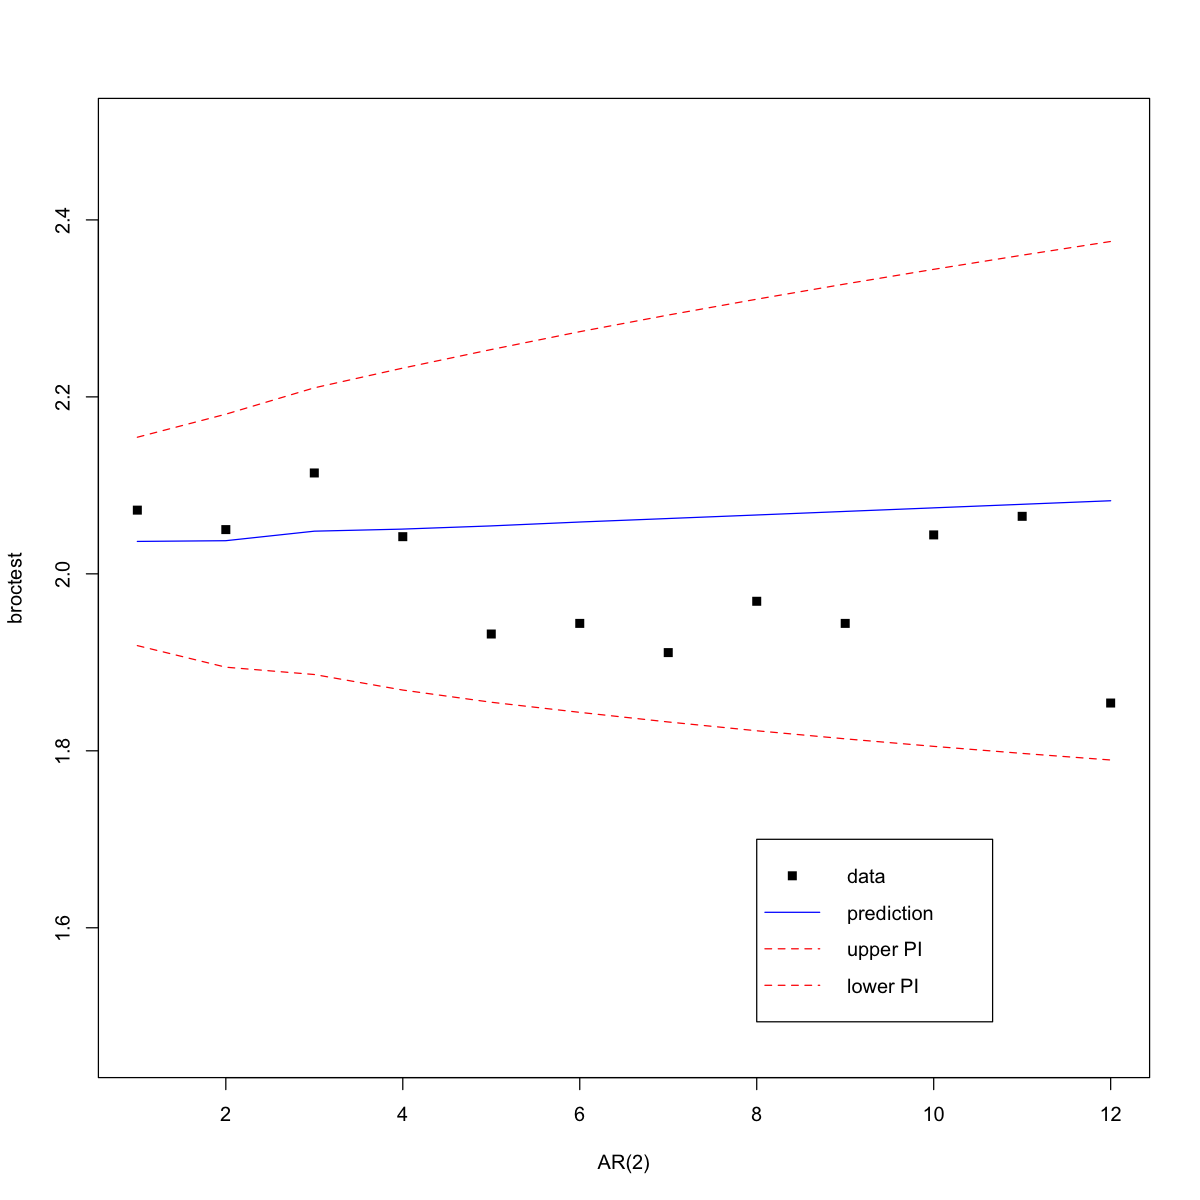

In [23]:
ar2pred<-sarima.for(broc,12,2,1,0,plot=FALSE)
options(repr.plot.width=10, repr.plot.height=10)
plot(broctest,pch=15,asp=10,xlab="AR(2)")
lines(1:12,ar2pred$pred,lty=1,col='blue')
lines(1:12,ar2pred$pred+ar2pred$se,lty=2,col='red')
lines(1:12,ar2pred$pred-ar2pred$se,lty=2,col='red')
legend(8,1.7,legend=c("data","prediction","upper PI", "lower PI"),col=c('black','blue','red','red'),pch=c(15,NA,NA,NA),lty=c(NA,1,2,2))

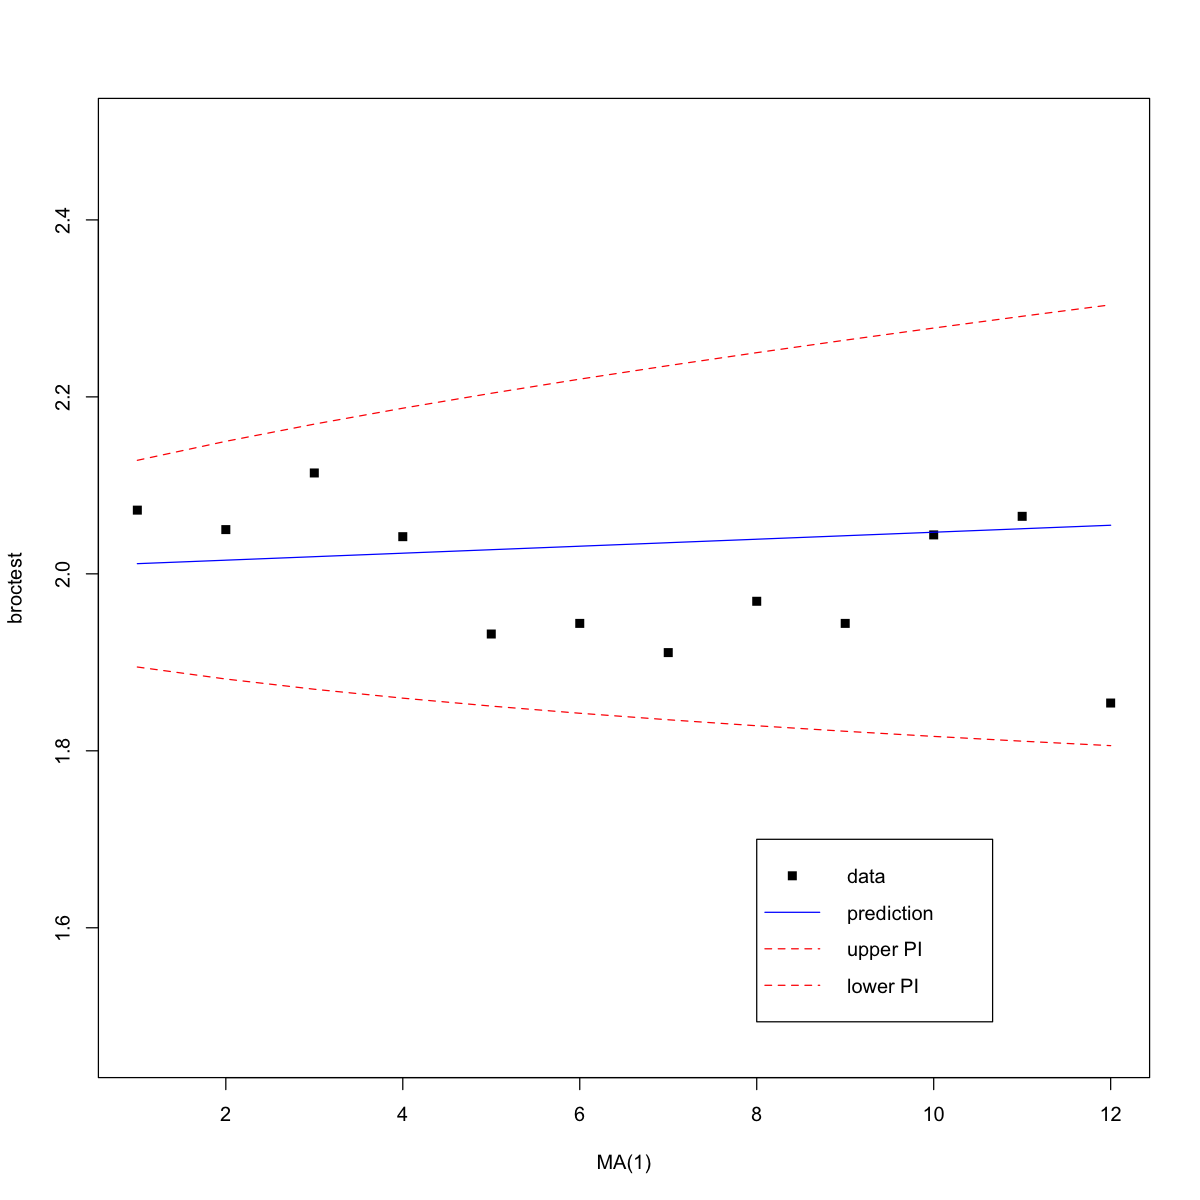

In [24]:
ma1pred<-sarima.for(broc,12,0,1,1,plot=FALSE)
plot(broctest,pch=15,asp=10,xlab="MA(1)")
lines(1:12,ma1pred$pred,lty=1,col='blue')
lines(1:12,ma1pred$pred+ma1pred$se,lty=2,col='red')
lines(1:12,ma1pred$pred-ma1pred$se,lty=2,col='red')
legend(8,1.7,legend=c("data","prediction","upper PI", "lower PI"),col=c('black','blue','red','red'),pch=c(15,NA,NA,NA),lty=c(NA,1,2,2))

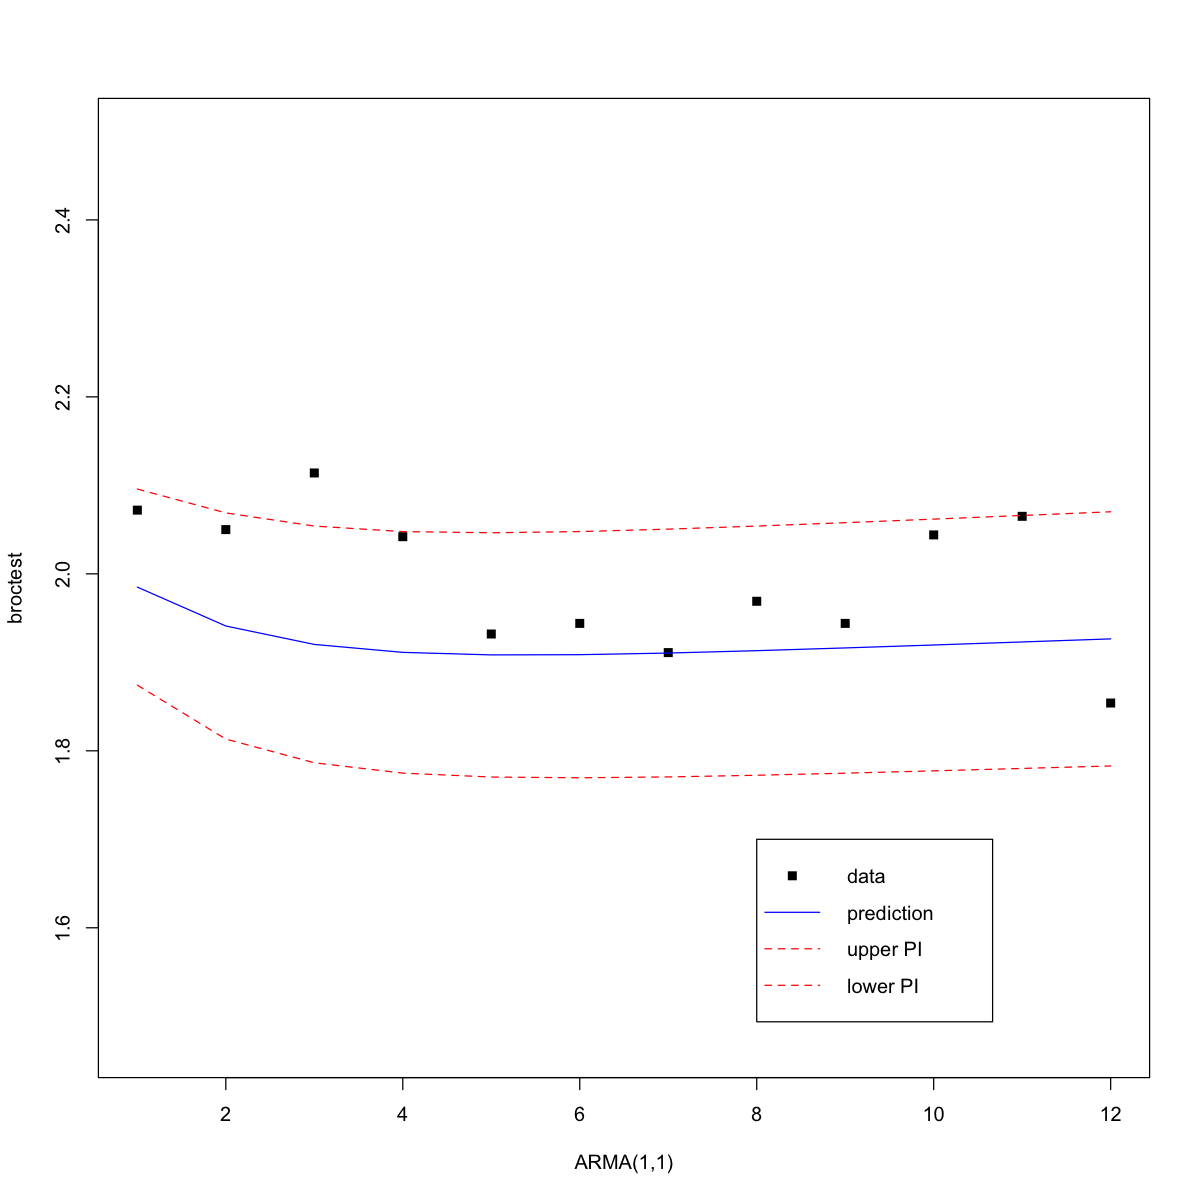

In [25]:
armapred<-sarima.for(broc,12,1,1,1,plot=FALSE)
plot(broctest,pch=15,asp=10,xlab="ARMA(1,1)")
lines(1:12,armapred$pred,lty=1,col='blue')
lines(1:12,armapred$pred+armapred$se,lty=2,col='red')
lines(1:12,armapred$pred-armapred$se,lty=2,col='red')
legend(8,1.7,legend=c("data","prediction","upper PI", "lower PI"),col=c('black','blue','red','red'),pch=c(15,NA,NA,NA),lty=c(NA,1,2,2))

In [26]:
#part(f)
library(Metrics)
(rmse(broctest,ar2pred$pred))
(rmse(broctest,ma1pred$pred))
(rmse(broctest,armapred$pred))

[1] 0.1063574

[1] 0.09200882

[1] 0.1002683

In [27]:
(mape(broctest,ar2pred$pred))
(mape(broctest,ma1pred$pred))
(mape(broctest,armapred$pred))

[1] 0.04328882

[1] 0.03853135

[1] 0.0410659

In [28]:
(mae(broctest,ar2pred$pred))
(mae(broctest,ma1pred$pred))
(mae(broctest,armapred$pred))

[1] 0.08395276

[1] 0.07518795

[1] 0.08352372

In [29]:
#problem 6
varvelog<-log(varve)

In [30]:
n<-length(varvelog)
ks<-Ksmooth0(n,varvelog,A=0.9776,mu0=3.5267,Sigma0=0,Phi=0.999,cQ=0.0133,cR=0.1805)
ks2<-Ksmooth0(n,varvelog,A=0.9776,mu0=3.5267,Sigma0=0,Phi=0.999,cQ=0.0133,cR=0.05)
ks3<-Ksmooth0(n,varvelog,A=0.9776,mu0=3.5267,Sigma0=0,Phi=0.999,cQ=0.0133,cR=0.5)
kp<-Kfilter0(n,varvelog,A=0.9776,mu0=3.5267,Sigma0=0,Phi=0.999,cQ=0.0133,cR=0.1805)
kp2<-Kfilter0(n,varvelog,A=0.9776,mu0=3.5267,Sigma0=0,Phi=0.999,cQ=0.0133,cR=0.05)
kp3<-Kfilter0(n,varvelog,A=0.9776,mu0=3.5267,Sigma0=0,Phi=0.999,cQ=0.0133,cR=0.5)

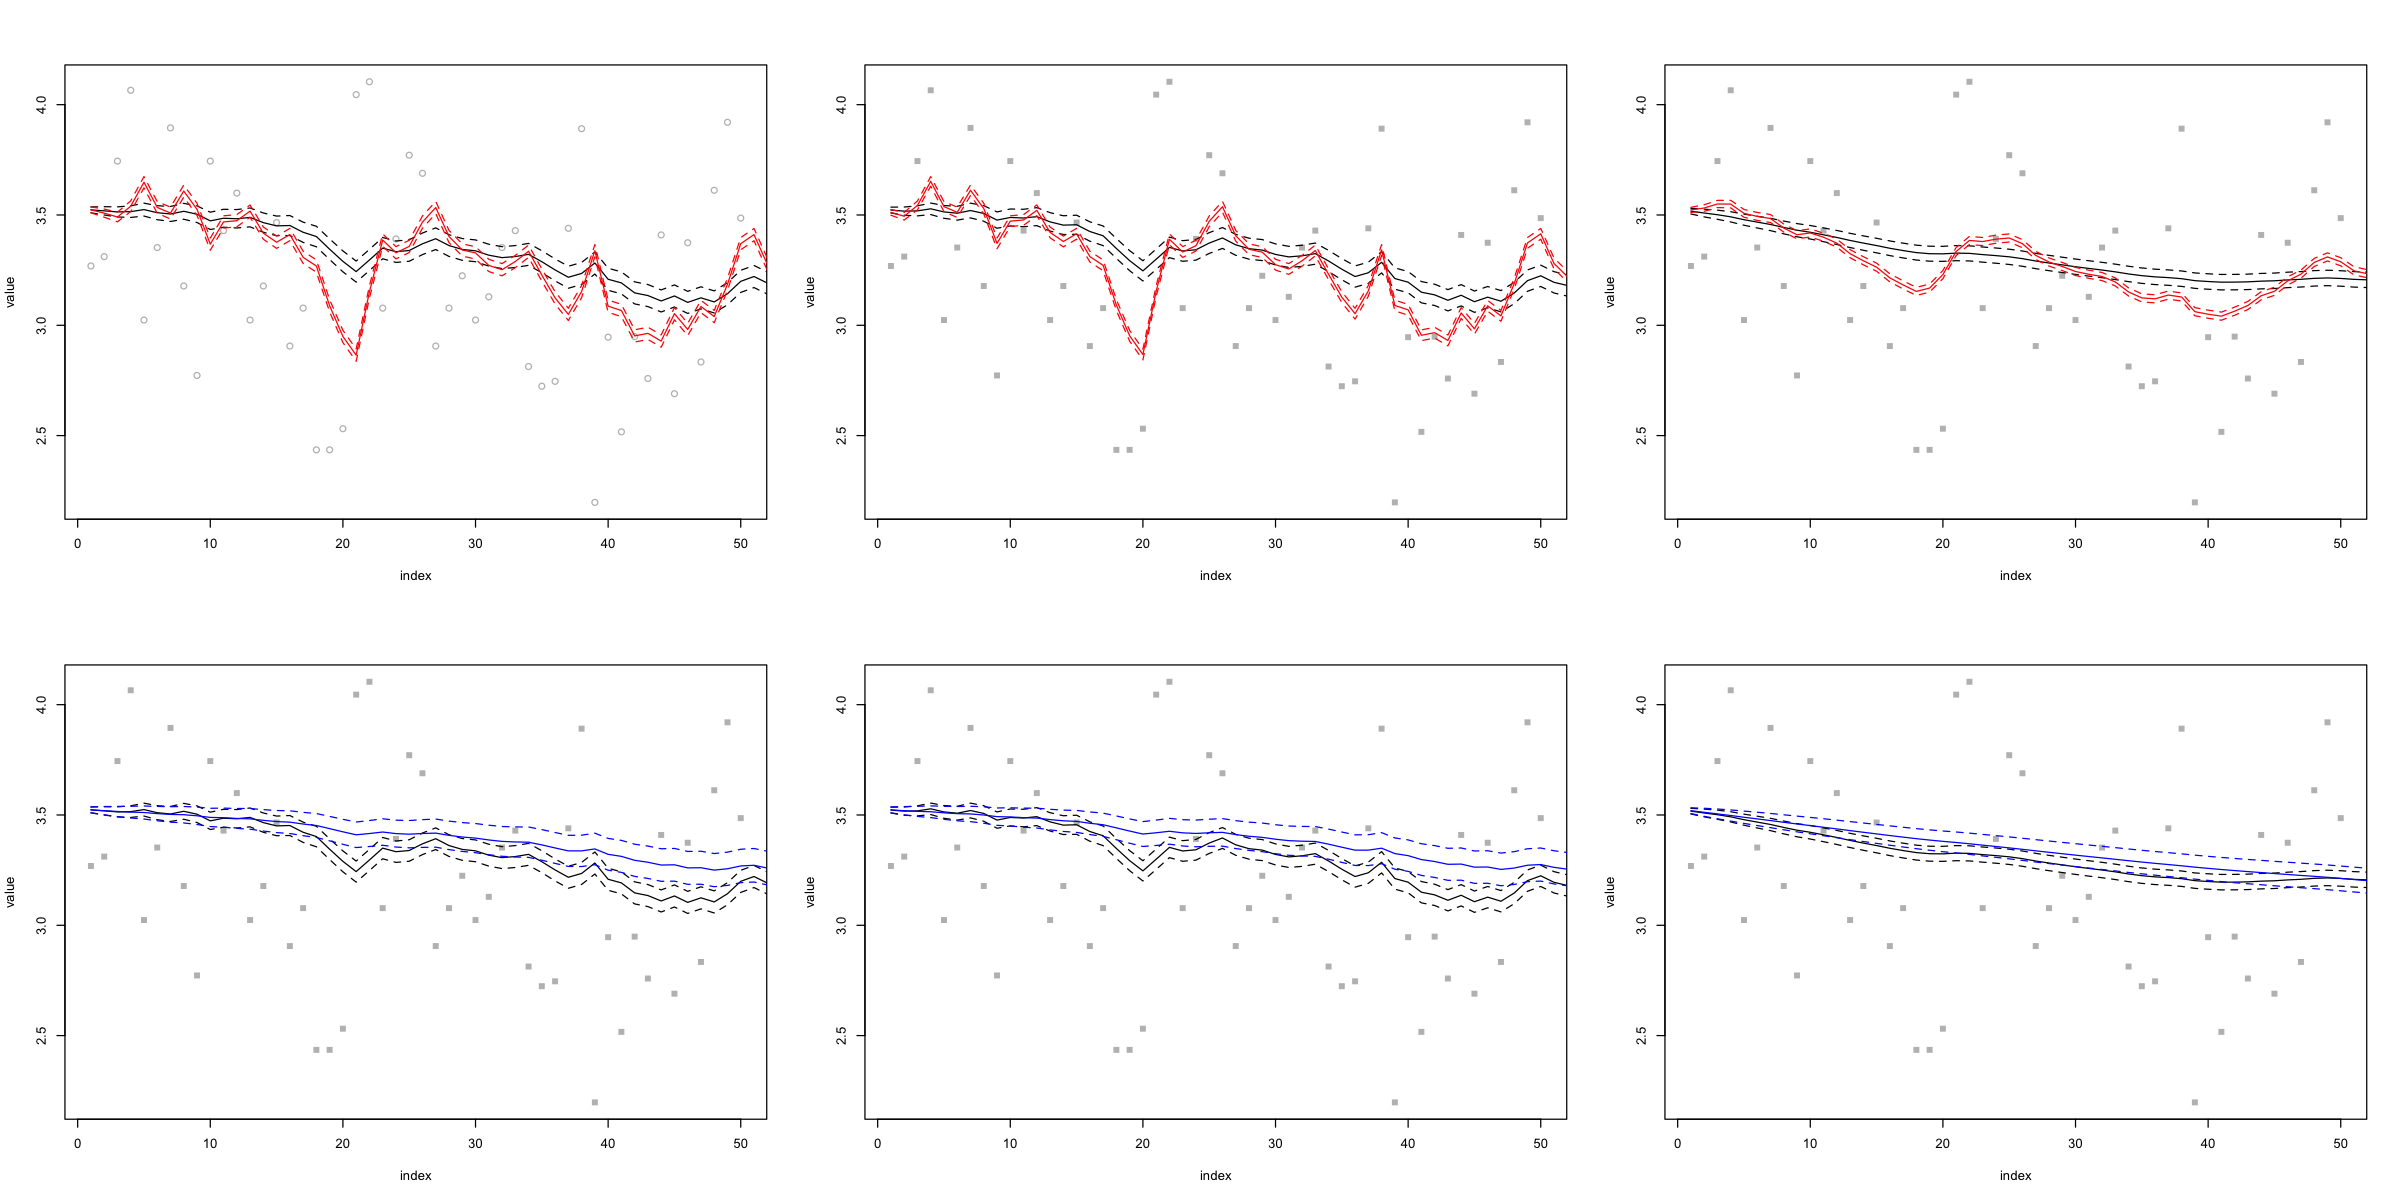

In [31]:
par(mfrow=c(2,3))
options(repr.plot.width=20, repr.plot.height=10)
plot(varvelog[1:50],col='grey',xlab='index',ylab='value')
  lines(kp$xp,lty=1,col='black')
  lines(kp$xp+sqrt(kp$Pp),lty=2,col='black')
  lines(kp$xp-sqrt(kp$Pp),lty=2,col='black')
  lines(kp2$xp,lty=1,col='red')
  lines(kp2$xp+sqrt(kp2$Pp),lty=2,col='red')
  lines(kp2$xp-sqrt(kp2$Pp),lty=2,col='red')
plot(varvelog[1:50],pch=15,col='grey',xlab='index',ylab='value')
  lines(kp$xf,lty=1,col='black')
  lines(kp$xf+sqrt(kp$Pf),lty=2,col='black')
  lines(kp$xf-sqrt(kp$Pf),lty=2,col='black')
  lines(kp2$xf,lty=1,col='red')
  lines(kp2$xf+sqrt(kp2$Pf),lty=2,col='red')
  lines(kp2$xf-sqrt(kp2$Pf),lty=2,col='red')
plot(varvelog[1:50],pch=15,col='grey',xlab='index',ylab='value')
  lines(ks$xs,lty=1,col='black')
  lines(ks$xs+sqrt(ks$Ps),lty=2,col='black')
  lines(ks$xs-sqrt(ks$Ps),lty=2,col='black')
  lines(ks2$xs,lty=1,col='red')
  lines(ks2$xs+sqrt(ks2$Ps),lty=2,col='red')
  lines(ks2$xs-sqrt(ks2$Ps),lty=2,col='red')
plot(varvelog[1:50],pch=15,col='grey',xlab='index',ylab='value')
  lines(kp$xp,lty=1,col='black')
  lines(kp$xp+sqrt(kp$Pp),lty=2,col='black')
  lines(kp$xp-sqrt(kp$Pp),lty=2,col='black')
  lines(kp3$xp,lty=1,col='blue')
  lines(kp3$xp+sqrt(kp3$Pp),lty=2,col='blue')
  lines(kp3$xp-sqrt(kp3$Pp),lty=2,col='blue')
plot(varvelog[1:50],pch=15,col='grey',xlab='index',ylab='value')
  lines(kp$xf,lty=1,col='black')
  lines(kp$xf+sqrt(kp$Pf),lty=2,col='black')
  lines(kp$xf-sqrt(kp$Pf),lty=2,col='black')
  lines(kp3$xf,lty=1,col='blue')
  lines(kp3$xf+sqrt(kp3$Pf),lty=2,col='blue')
  lines(kp3$xf-sqrt(kp3$Pf),lty=2,col='blue')
plot(varvelog[1:50],pch=15,col='grey',xlab='index',ylab='value')
  lines(ks$xs,lty=1,col='black')
  lines(ks$xs+sqrt(ks$Ps),lty=2,col='black')
  lines(ks$xs-sqrt(ks$Ps),lty=2,col='black')
  lines(ks3$xs,lty=1,col='blue')
  lines(ks3$xs+sqrt(ks3$Ps),lty=2,col='blue')
  lines(ks3$xs-sqrt(ks3$Ps),lty=2,col='blue')